In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Step 1: Generate a sample dataset
# Creating a dataset of points in a 2D space
data = pd.DataFrame({
    "x": np.random.uniform(0, 100, size=10),  # 10 random x-coordinates
    "y": np.random.uniform(0, 100, size=10)   # 10 random y-coordinates
})

In [3]:
# Preview the dataset
print("Sample Dataset:")
print(data)

Sample Dataset:
           x          y
0  43.388735  55.681955
1  23.566722  95.572344
2  90.761184  56.104141
3  38.698676  22.231749
4  23.376622  28.487331
5  31.771163  82.491864
6  76.823089   0.431450
7  19.557330  31.547390
8  50.701033  44.585400
9  83.282775  60.918146


In [4]:
# Step 2: Prepare for distance calculations
# Create a NumPy array from the data
points = data.to_numpy()

In [5]:
# Broadcasting to calculate pairwise distances
# Using broadcasting to compute the squared differences
diffs = points[:, np.newaxis, :] - points[np.newaxis, :, :]
squared_diffs = diffs ** 2

In [6]:
# Summing squared differences across dimensions to compute squared distances
distances = np.sqrt(squared_diffs.sum(axis=-1))

In [7]:
# Step 3: Display the resulting distance matrix
print("\nPairwise Distance Matrix:")
print(pd.DataFrame(distances))


Pairwise Distance Matrix:
           0           1          2          3          4          5  \
0   0.000000   44.543859  47.374330  33.777403  33.764364  29.218816   
1  44.543859    0.000000  77.928395  74.885372  67.085282  15.440590   
2  47.374330   77.928395   0.000000  62.111542  72.824223  64.623018   
3  33.777403   74.885372  62.111542   0.000000  16.549854  60.657002   
4  33.764364   67.085282  72.824223  16.549854   0.000000  54.653069   
5  29.218816   15.440590  64.623018  60.657002  54.653069   0.000000   
6  64.579209  109.032244  57.390931  43.917239  60.362714  93.614035   
7  33.917740   64.150370  75.319472  21.287844   4.893971  52.388139   
8  13.289215   57.757591  41.683295  25.372077  31.713897  42.370273   
9  40.236204   69.042888   8.893888  59.028630  68.121252  55.846857   

            6          7          8          9  
0   64.579209  33.917740  13.289215  40.236204  
1  109.032244  64.150370  57.757591  69.042888  
2   57.390931  75.319472  41.6832

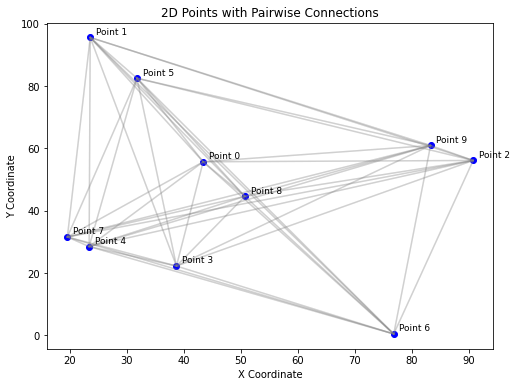

In [8]:
# Step 4: Optional visualization (for your video)
import matplotlib.pyplot as plt

# Scatter plot of points with annotated indices
plt.figure(figsize=(8, 6))
plt.scatter(data["x"], data["y"], color="blue")
for idx, (x, y) in enumerate(zip(data["x"], data["y"])):
    plt.text(x + 1, y + 1, f"Point {idx}", fontsize=9)

# Adding lines to represent pairwise connections
for i in range(len(points)):
    for j in range(len(points)):
        if i != j:  # Avoid connecting points to themselves
            plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], color="gray", alpha=0.2)

plt.title("2D Points with Pairwise Connections")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()